# Exploratory Data Analysis for Dengue AI Project - San Juan
Data source: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/ <BR>
Features: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/

In [1]:
import scipy as sp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline
import myutil_dviz as myutil
import warnings
warnings.filterwarnings('ignore')
import sys
print(sys.executable)

/Users/carlos2/anaconda/envs/dsdht/bin/python


In [2]:
import importlib
_ = importlib.reload(myutil)

## Get data and take first look at dataset

In [3]:
dfx_train = myutil.get_indexed_dataset('data/dengue_features_train.csv')
dfy_train = myutil.get_indexed_dataset('data/dengue_labels_train.csv')
dftrain = myutil.set_index(pd.merge(dfx_train, dfy_train))
dftrain.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
yearweekofyear,,,,,,,,,,,,,,,,,,,,,
199018,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
199019,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
199020,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
199021,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
199022,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


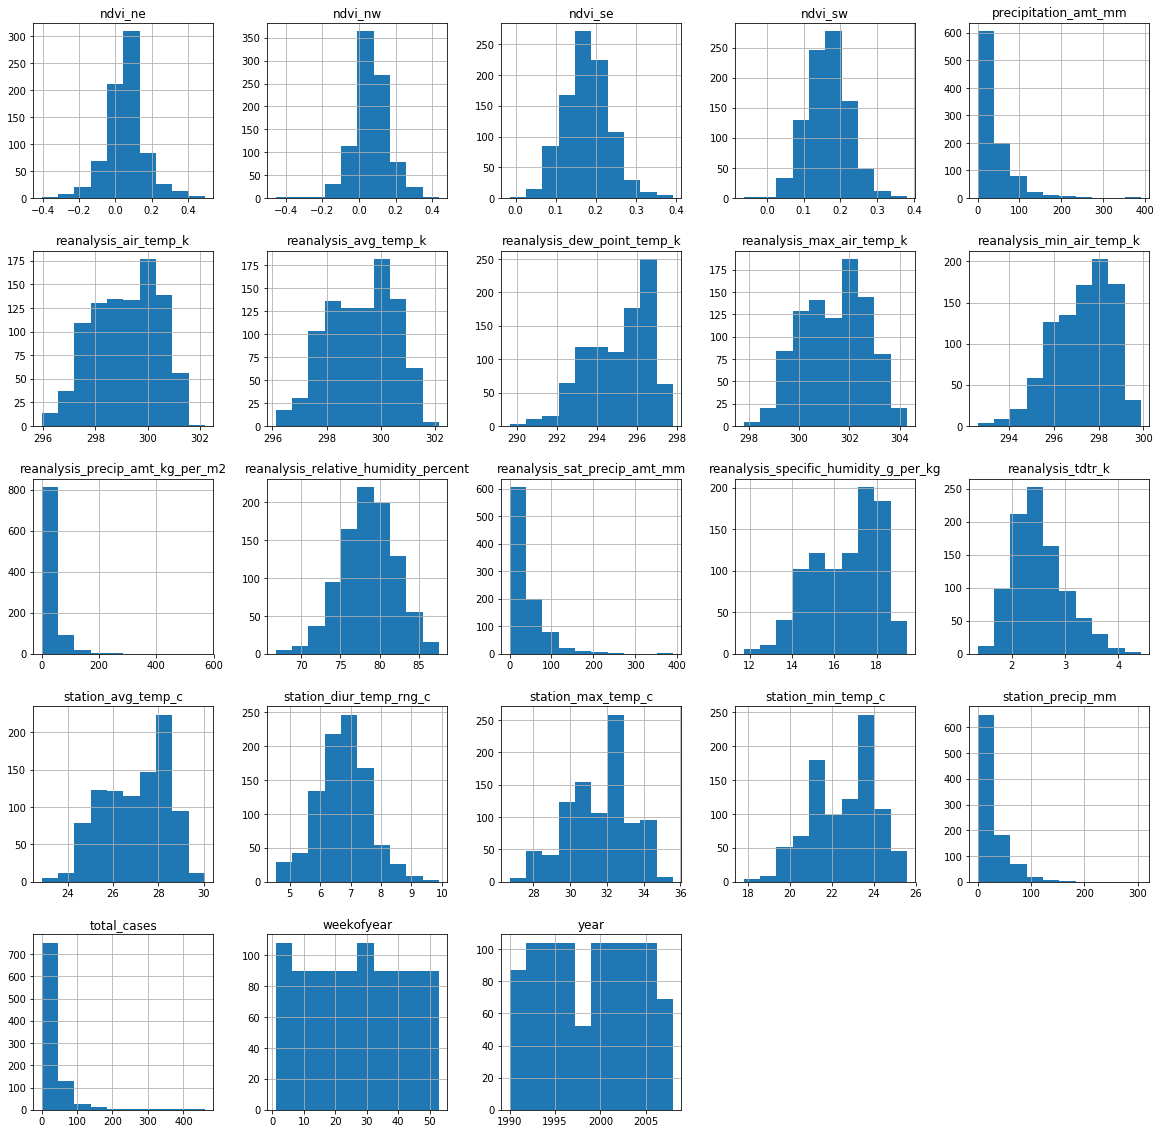

In [4]:
_ = dftrain[dftrain['city']=='sj'].hist(bins=10, figsize=(20,20))

In [5]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 199018 to 201025
Data columns (total 25 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_prec

## Deal with NaN on both training and test datasets together

In [6]:
dftrain.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [7]:
# all nan values will be replaced with the mean for the week of the year
dftrain = myutil.set_nan_to_week_mean(dftrain.copy())
dftrain.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

## Split dataset - Will analyze San Juan data only

In [8]:
dftrain_iq, dftrain_sj = myutil.split_dataset_by_city(dftrain)
dftrain = dftrain_sj.copy()

In [9]:
dfcorr = dftrain.drop(['city','year','weekofyear','week_start_date','total_cases'], axis=1)
dfcorr.corr()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
ndvi_ne,1.000000,0.606440,0.204963,0.158848,-0.037011,-0.046392,-0.044690,-0.018368,-0.019246,-0.070093,0.004709,0.040837,-0.037011,-0.013879,0.000974,0.063574,0.037756,0.089059,0.035423,-0.076996
ndvi_nw,0.606440,1.000000,0.191692,0.212027,-0.029056,-0.068175,-0.066994,-0.019461,-0.037741,-0.066940,0.010646,0.075629,-0.029056,-0.014163,-0.045290,0.076011,0.048186,0.132324,0.023560,-0.079683
ndvi_se,0.204963,0.191692,1.000000,0.820847,-0.119238,-0.014970,-0.012267,-0.062895,-0.008455,-0.045978,-0.130112,-0.113299,-0.119238,-0.058609,0.028792,-0.068113,-0.025875,-0.061582,-0.068125,-0.136909
ndvi_sw,0.158848,0.212027,0.820847,1.000000,-0.117241,-0.041539,-0.034053,-0.086101,-0.013273,-0.070243,-0.124768,-0.117654,-0.117241,-0.079115,0.053961,-0.050407,0.022784,-0.016005,-0.071323,-0.176366
precipitation_amt_mm,-0.037011,-0.029056,-0.119238,-0.117241,1.000000,0.236161,0.224588,0.404070,0.258954,0.248334,0.509655,0.500675,1.000000,0.411344,-0.092340,0.201299,-0.108167,0.190930,0.223535,0.555449
reanalysis_air_temp_k,-0.046392,-0.068175,-0.014970,-0.041539,0.236161,1.000000,0.997503,0.903587,0.935288,0.942445,0.081334,0.299827,0.236161,0.905126,0.176777,0.864954,0.090407,0.698434,0.826261,0.115523
reanalysis_avg_temp_k,-0.044690,-0.066994,-0.012267,-0.034053,0.224588,0.997503,1.000000,0.895452,0.939157,0.939323,0.063540,0.285904,0.224588,0.896518,0.199897,0.863643,0.099741,0.703905,0.820823,0.099356
reanalysis_dew_point_temp_k,-0.018368,-0.019461,-0.062895,-0.086101,0.404070,0.903587,0.895452,1.000000,0.847714,0.899116,0.329336,0.679385,0.404070,0.998536,-0.033845,0.852675,-0.001288,0.688328,0.843725,0.280215
reanalysis_max_air_temp_k,-0.019246,-0.037741,-0.008455,-0.013273,0.258954,0.935288,0.939157,0.847714,1.000000,0.829081,0.092606,0.289237,0.258954,0.853703,0.351518,0.834448,0.131464,0.759956,0.764397,0.104101
reanalysis_min_air_temp_k,-0.070093,-0.066940,-0.045978,-0.070243,0.248334,0.942445,0.939323,0.899116,0.829081,1.000000,0.133873,0.386408,0.248334,0.896539,-0.050404,0.831490,0.031809,0.626627,0.823674,0.151379


## Analysis of temperature data

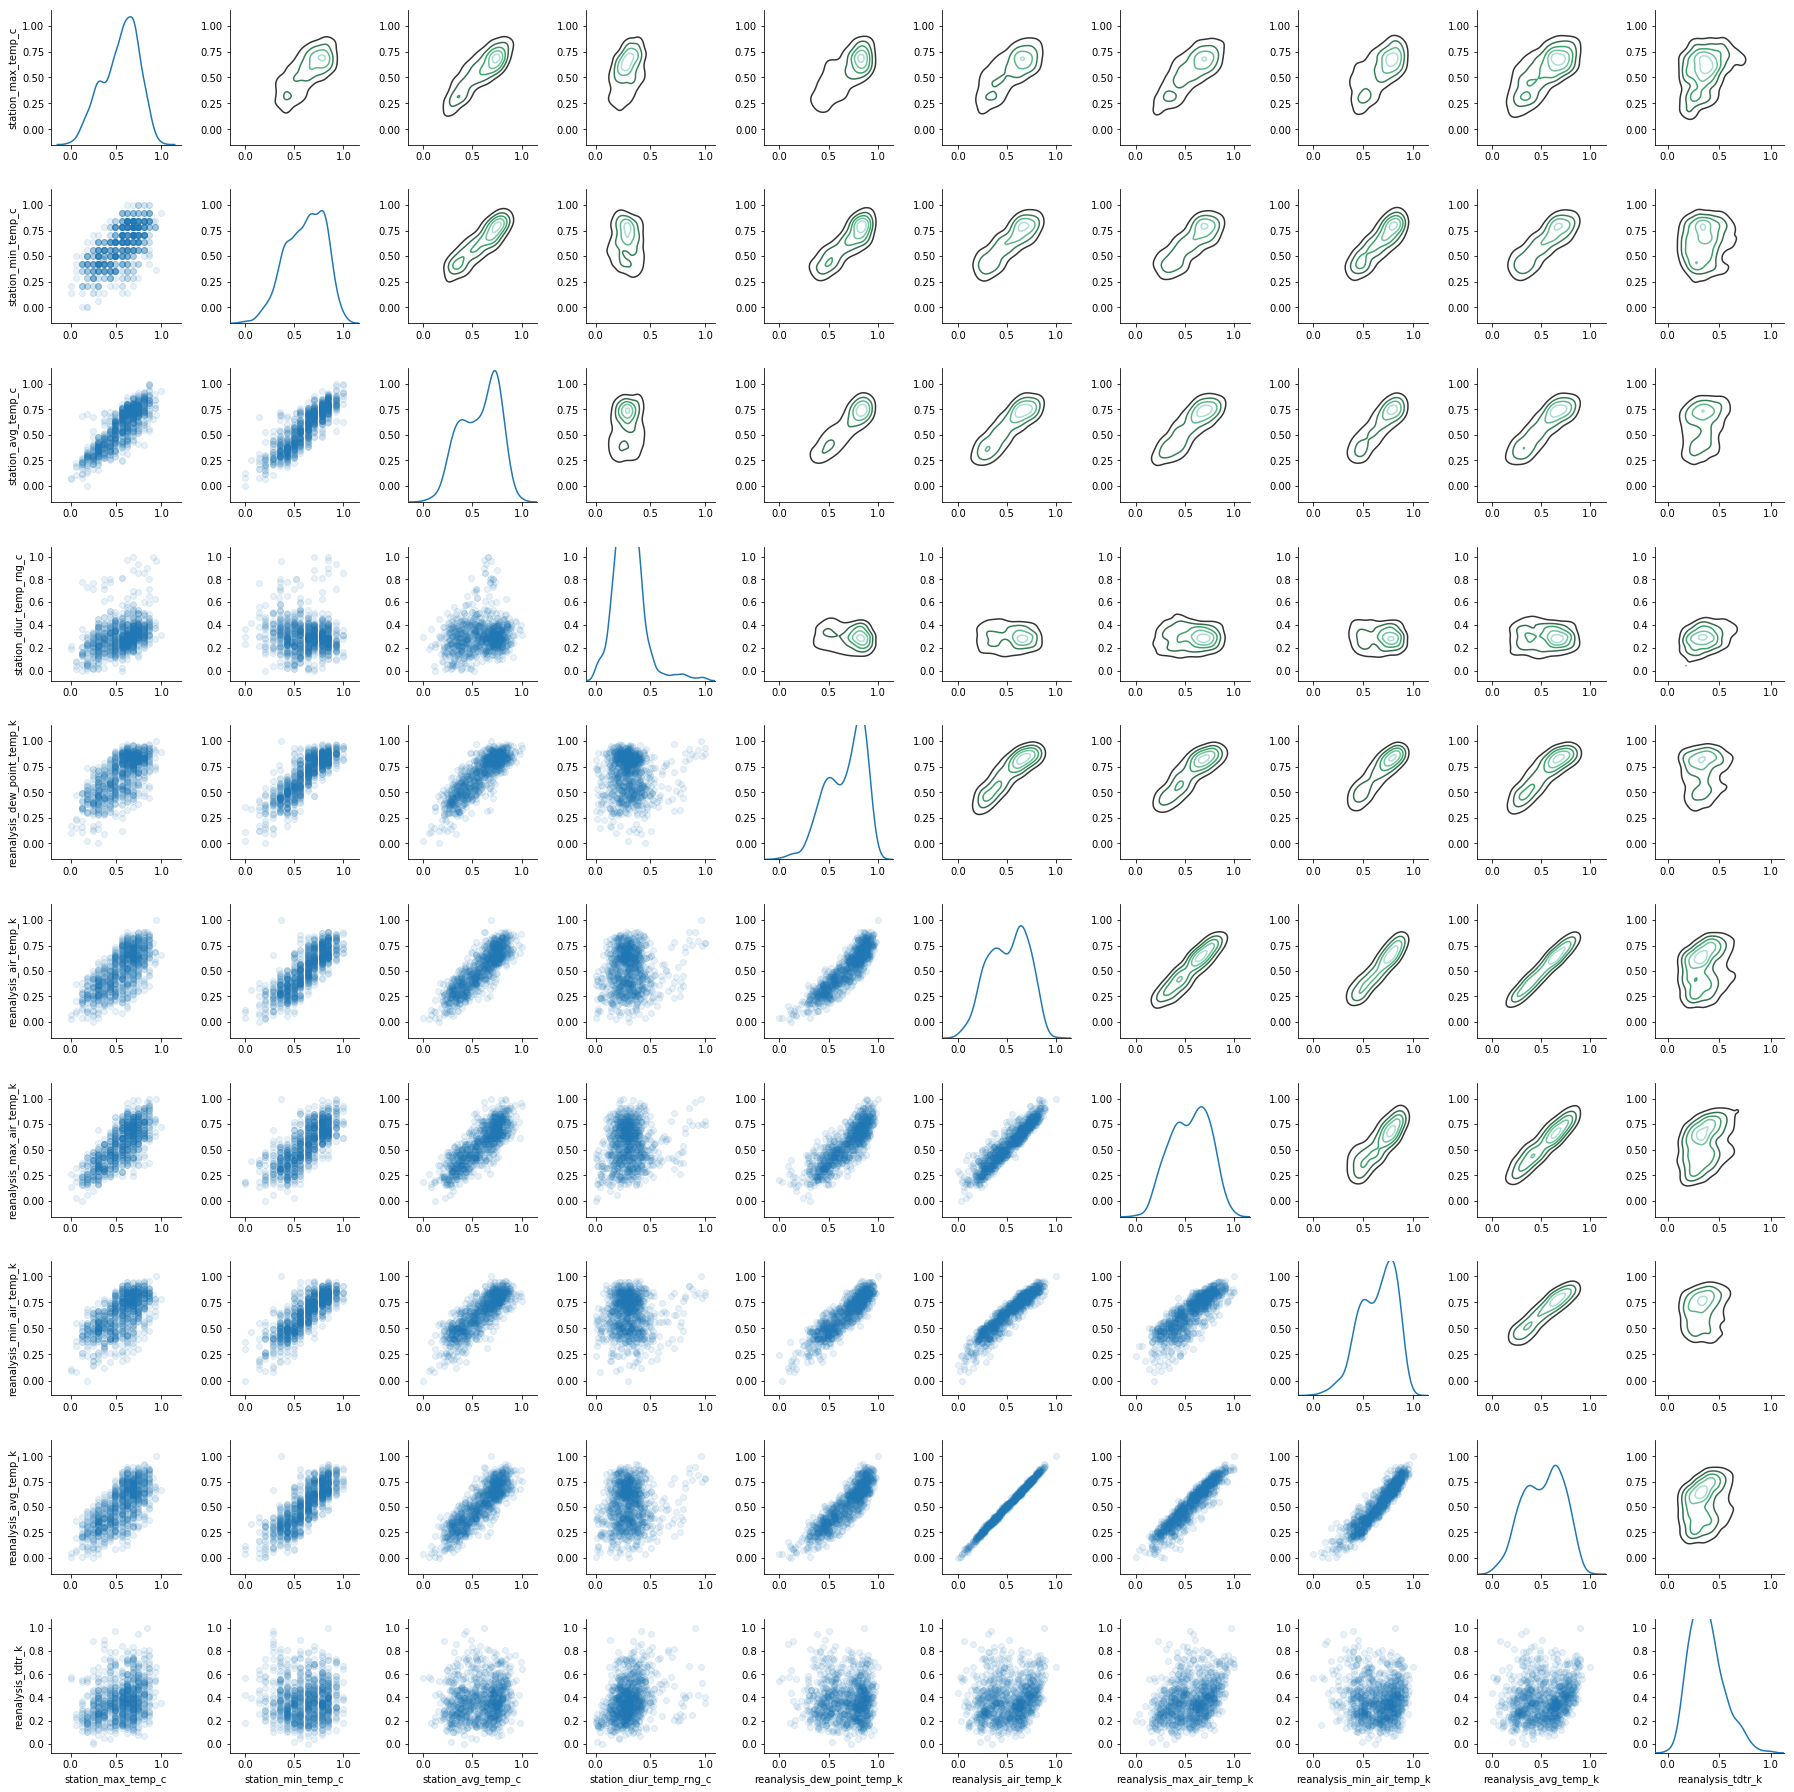

In [10]:
#columns = ['station_max_temp_c','station_min_temp_c','station_avg_temp_c','station_precip_mm',\
#           'station_diur_temp_rng_c','total_cases']

columns = ['station_max_temp_c', 'station_min_temp_c', 'station_avg_temp_c', 'station_diur_temp_rng_c',\
           'reanalysis_dew_point_temp_k', 'reanalysis_air_temp_k', 'reanalysis_max_air_temp_k',\
           'reanalysis_min_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_tdtr_k']

x = dftrain[columns].values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
x_scaled = scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=columns)

g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_lower(plt.scatter, alpha=0.1)
_ = g.map_upper(sns.kdeplot, n_levels=5)

In [11]:
df.corr()

,station_max_temp_c,station_min_temp_c,station_avg_temp_c,station_diur_temp_rng_c,reanalysis_dew_point_temp_k,reanalysis_air_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_avg_temp_k,reanalysis_tdtr_k
station_max_temp_c,1.000000,0.667127,0.841536,0.381271,0.688328,0.698434,0.759957,0.626628,0.703905,0.281885
station_min_temp_c,0.667127,1.000000,0.872073,-0.090133,0.843725,0.826261,0.764396,0.823675,0.820823,0.003391
station_avg_temp_c,0.841536,0.872073,1.000000,0.174568,0.852675,0.864954,0.834447,0.831490,0.863643,0.119305
station_diur_temp_rng_c,0.381271,-0.090133,0.174568,1.000000,-0.001288,0.090408,0.131464,0.031809,0.099741,0.322856
reanalysis_dew_point_temp_k,0.688328,0.843725,0.852675,-0.001288,1.000000,0.903587,0.847713,0.899116,0.895452,-0.033846
reanalysis_air_temp_k,0.698434,0.826261,0.864954,0.090408,0.903587,1.000000,0.935287,0.942445,0.997503,0.176777
reanalysis_max_air_temp_k,0.759957,0.764396,0.834447,0.131464,0.847713,0.935287,1.000000,0.829081,0.939156,0.351518
reanalysis_min_air_temp_k,0.626628,0.823675,0.831490,0.031809,0.899116,0.942445,0.829081,1.000000,0.939323,-0.050404
reanalysis_avg_temp_k,0.703905,0.820823,0.863643,0.099741,0.895452,0.997503,0.939156,0.939323,1.000000,0.199896
reanalysis_tdtr_k,0.281885,0.003391,0.119305,0.322856,-0.033846,0.176777,0.351518,-0.050404,0.199896,1.000000


In [12]:
df.describe(percentiles=[0.025, .25, .5, .75,.975])

,station_max_temp_c,station_min_temp_c,station_avg_temp_c,station_diur_temp_rng_c,reanalysis_dew_point_temp_k,reanalysis_air_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_avg_temp_k,reanalysis_tdtr_k
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.551238,0.613386,0.576369,0.303293,0.669688,0.514152,0.552652,0.643234,0.521793,0.376938
std,0.193739,0.192903,0.192099,0.137342,0.192230,0.197170,0.193493,0.177107,0.201141,0.162045
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.5%,0.179775,0.205128,0.215415,0.062762,0.289316,0.132817,0.190387,0.260277,0.127362,0.125581
25%,0.438202,0.500000,0.415020,0.221515,0.516425,0.359688,0.400002,0.506847,0.359797,0.260465
50%,0.561798,0.641026,0.610672,0.291661,0.711933,0.527151,0.569233,0.671234,0.539551,0.355814
75%,0.685393,0.782051,0.735178,0.369191,0.830734,0.669519,0.707695,0.794521,0.679163,0.466279
97.5%,0.865169,0.923077,0.872777,0.677458,0.935345,0.831451,0.892311,0.904114,0.850060,0.739535
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Analysis of precipitation data

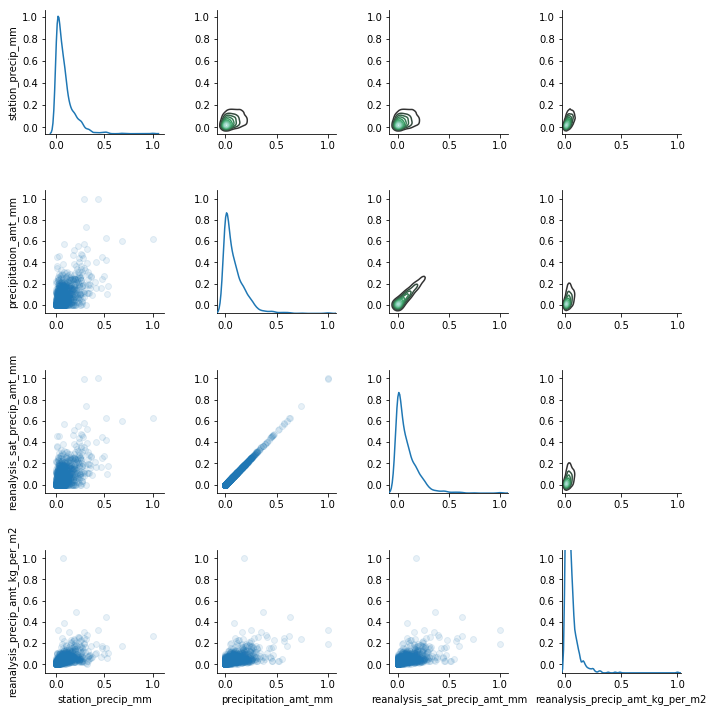

In [13]:
columns = ['station_precip_mm', 'precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm',\
           'reanalysis_precip_amt_kg_per_m2']

x = dftrain[columns].values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
x_scaled = scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=columns)

g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_lower(plt.scatter, alpha=0.1)
_ = g.map_upper(sns.kdeplot, n_levels=10)

In [14]:
df.corr()

,station_precip_mm,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,reanalysis_precip_amt_kg_per_m2
station_precip_mm,1.000000,0.555449,0.555449,0.471221
precipitation_amt_mm,0.555449,1.000000,1.000000,0.509655
reanalysis_sat_precip_amt_mm,0.555449,1.000000,1.000000,0.509655
reanalysis_precip_amt_kg_per_m2,0.471221,0.509655,0.509655,1.000000


In [15]:
df.describe(percentiles=[.25, .5, .75,.95])

,station_precip_mm,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,reanalysis_precip_amt_kg_per_m2
count,936.000000,936.000000,936.000000,936.000000
mean,0.088493,0.090399,0.090399,0.053261
std,0.096184,0.113745,0.113745,0.062275
min,0.000000,0.000000,0.000000,0.000000
25%,0.022556,0.000000,0.000000,0.019106
50%,0.059170,0.052752,0.052752,0.037108
75%,0.119157,0.132264,0.132264,0.064724
95%,0.266672,0.284799,0.284799,0.161569
max,1.000000,1.000000,1.000000,1.000000


## Analysis of humidity data 

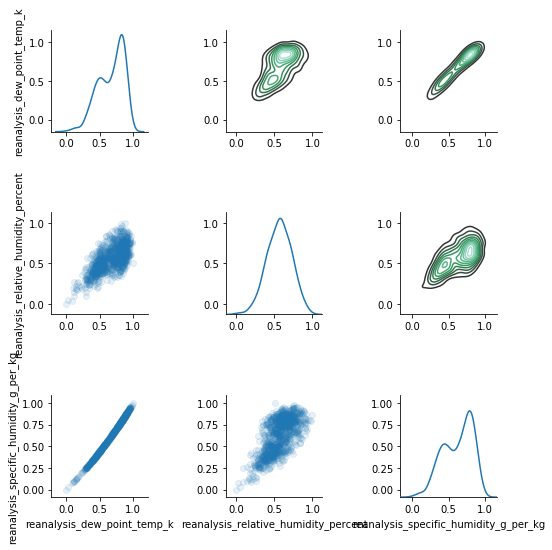

In [16]:
columns = ['reanalysis_dew_point_temp_k', 'reanalysis_relative_humidity_percent',\
           'reanalysis_specific_humidity_g_per_kg']

x = dftrain[columns].values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
x_scaled = scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=columns)

g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_lower(plt.scatter, alpha=0.1)
_ = g.map_upper(sns.kdeplot, n_levels=10)

In [17]:
df.corr()

,reanalysis_dew_point_temp_k,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg
reanalysis_dew_point_temp_k,1.000000,0.679385,0.998536
reanalysis_relative_humidity_percent,0.679385,1.000000,0.674259
reanalysis_specific_humidity_g_per_kg,0.998536,0.674259,1.000000


In [18]:
df.describe(percentiles=[0.025, .25, .5, .75,.975])

,reanalysis_dew_point_temp_k,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg
count,936.000000,936.000000,936.000000
mean,0.669688,0.567500,0.625271
std,0.192230,0.162160,0.201746
min,0.000000,0.000000,0.000000
2.5%,0.289316,0.244953,0.244128
25%,0.516425,0.456916,0.457324
50%,0.711933,0.571189,0.662382
75%,0.830734,0.681930,0.794711
97.5%,0.935345,0.874366,0.920635
max,1.000000,1.000000,1.000000


## Analysis of location features

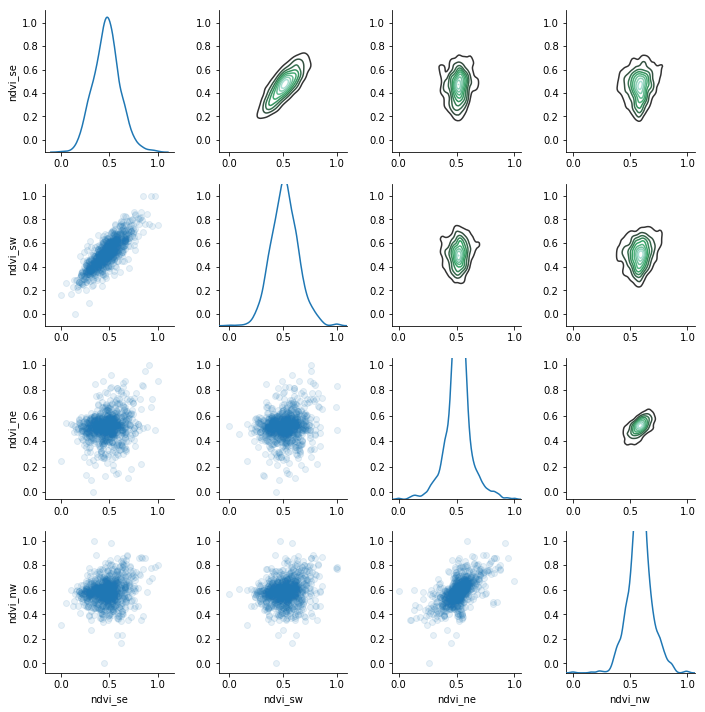

In [19]:
columns = ['ndvi_se', 'ndvi_sw', 'ndvi_ne', 'ndvi_nw']

x = dftrain[columns].values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
x_scaled = scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=columns)

g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_lower(plt.scatter, alpha=0.1)
_ = g.map_upper(sns.kdeplot, n_levels=10)

In [20]:
df.corr()

,ndvi_se,ndvi_sw,ndvi_ne,ndvi_nw
ndvi_se,1.000000,0.820847,0.204963,0.191692
ndvi_sw,0.820847,1.000000,0.158848,0.212027
ndvi_ne,0.204963,0.158848,1.000000,0.606440
ndvi_nw,0.191692,0.212027,0.606440,1.000000


In [21]:
df.describe(percentiles=[0.025, .25, .5, .75,.975])

,ndvi_se,ndvi_sw,ndvi_ne,ndvi_nw
count,936.000000,936.000000,936.000000,936.000000
mean,0.472787,0.515260,0.515771,0.585872
std,0.138489,0.124826,0.107111,0.100998
min,0.000000,0.000000,0.000000,0.000000
2.5%,0.211114,0.277555,0.280533,0.386790
25%,0.380887,0.434687,0.469126,0.531579
50%,0.471865,0.514749,0.518794,0.586151
75%,0.555789,0.597292,0.562774,0.636811
97.5%,0.753337,0.773313,0.760455,0.802627
max,1.000000,1.000000,1.000000,1.000000


## A closer look at total cases

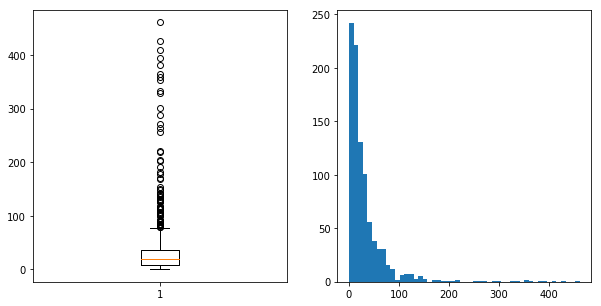

In [22]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
plt.subplot(121)
_ = plt.boxplot(dftrain['total_cases'])
ax = plt.subplot(122)
_ = plt.hist(dftrain['total_cases'], bins=50)

In [23]:
dftrain['total_cases'].describe(percentiles=[.25, .5, .75,.95])

count    936.000000
mean      34.180556
std       51.381372
min        0.000000
25%        9.000000
50%       19.000000
75%       37.000000
95%      112.000000
max      461.000000
Name: total_cases, dtype: float64

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
nrows = dftrain['total_cases'].values.shape[0]
test_arry = dftrain['total_cases'].values.reshape(nrows,1)
clf = IsolationForest(max_samples=nrows, random_state=42)
clf.fit(test_arry)
clf.predict(np.array([[79]]))
np.percentile(test_arry,95)

112.0

In [25]:
dftemp = dftrain.columns.copy().values
nrows = dftemp.shape[0]
clf = IsolationForest(max_samples=nrows, random_state=42)
clf.fit(test_arry)
clf.predict(np.array([[79]]))
np.percentile(test_arry,75)*1.5

55.5

## View data as time series

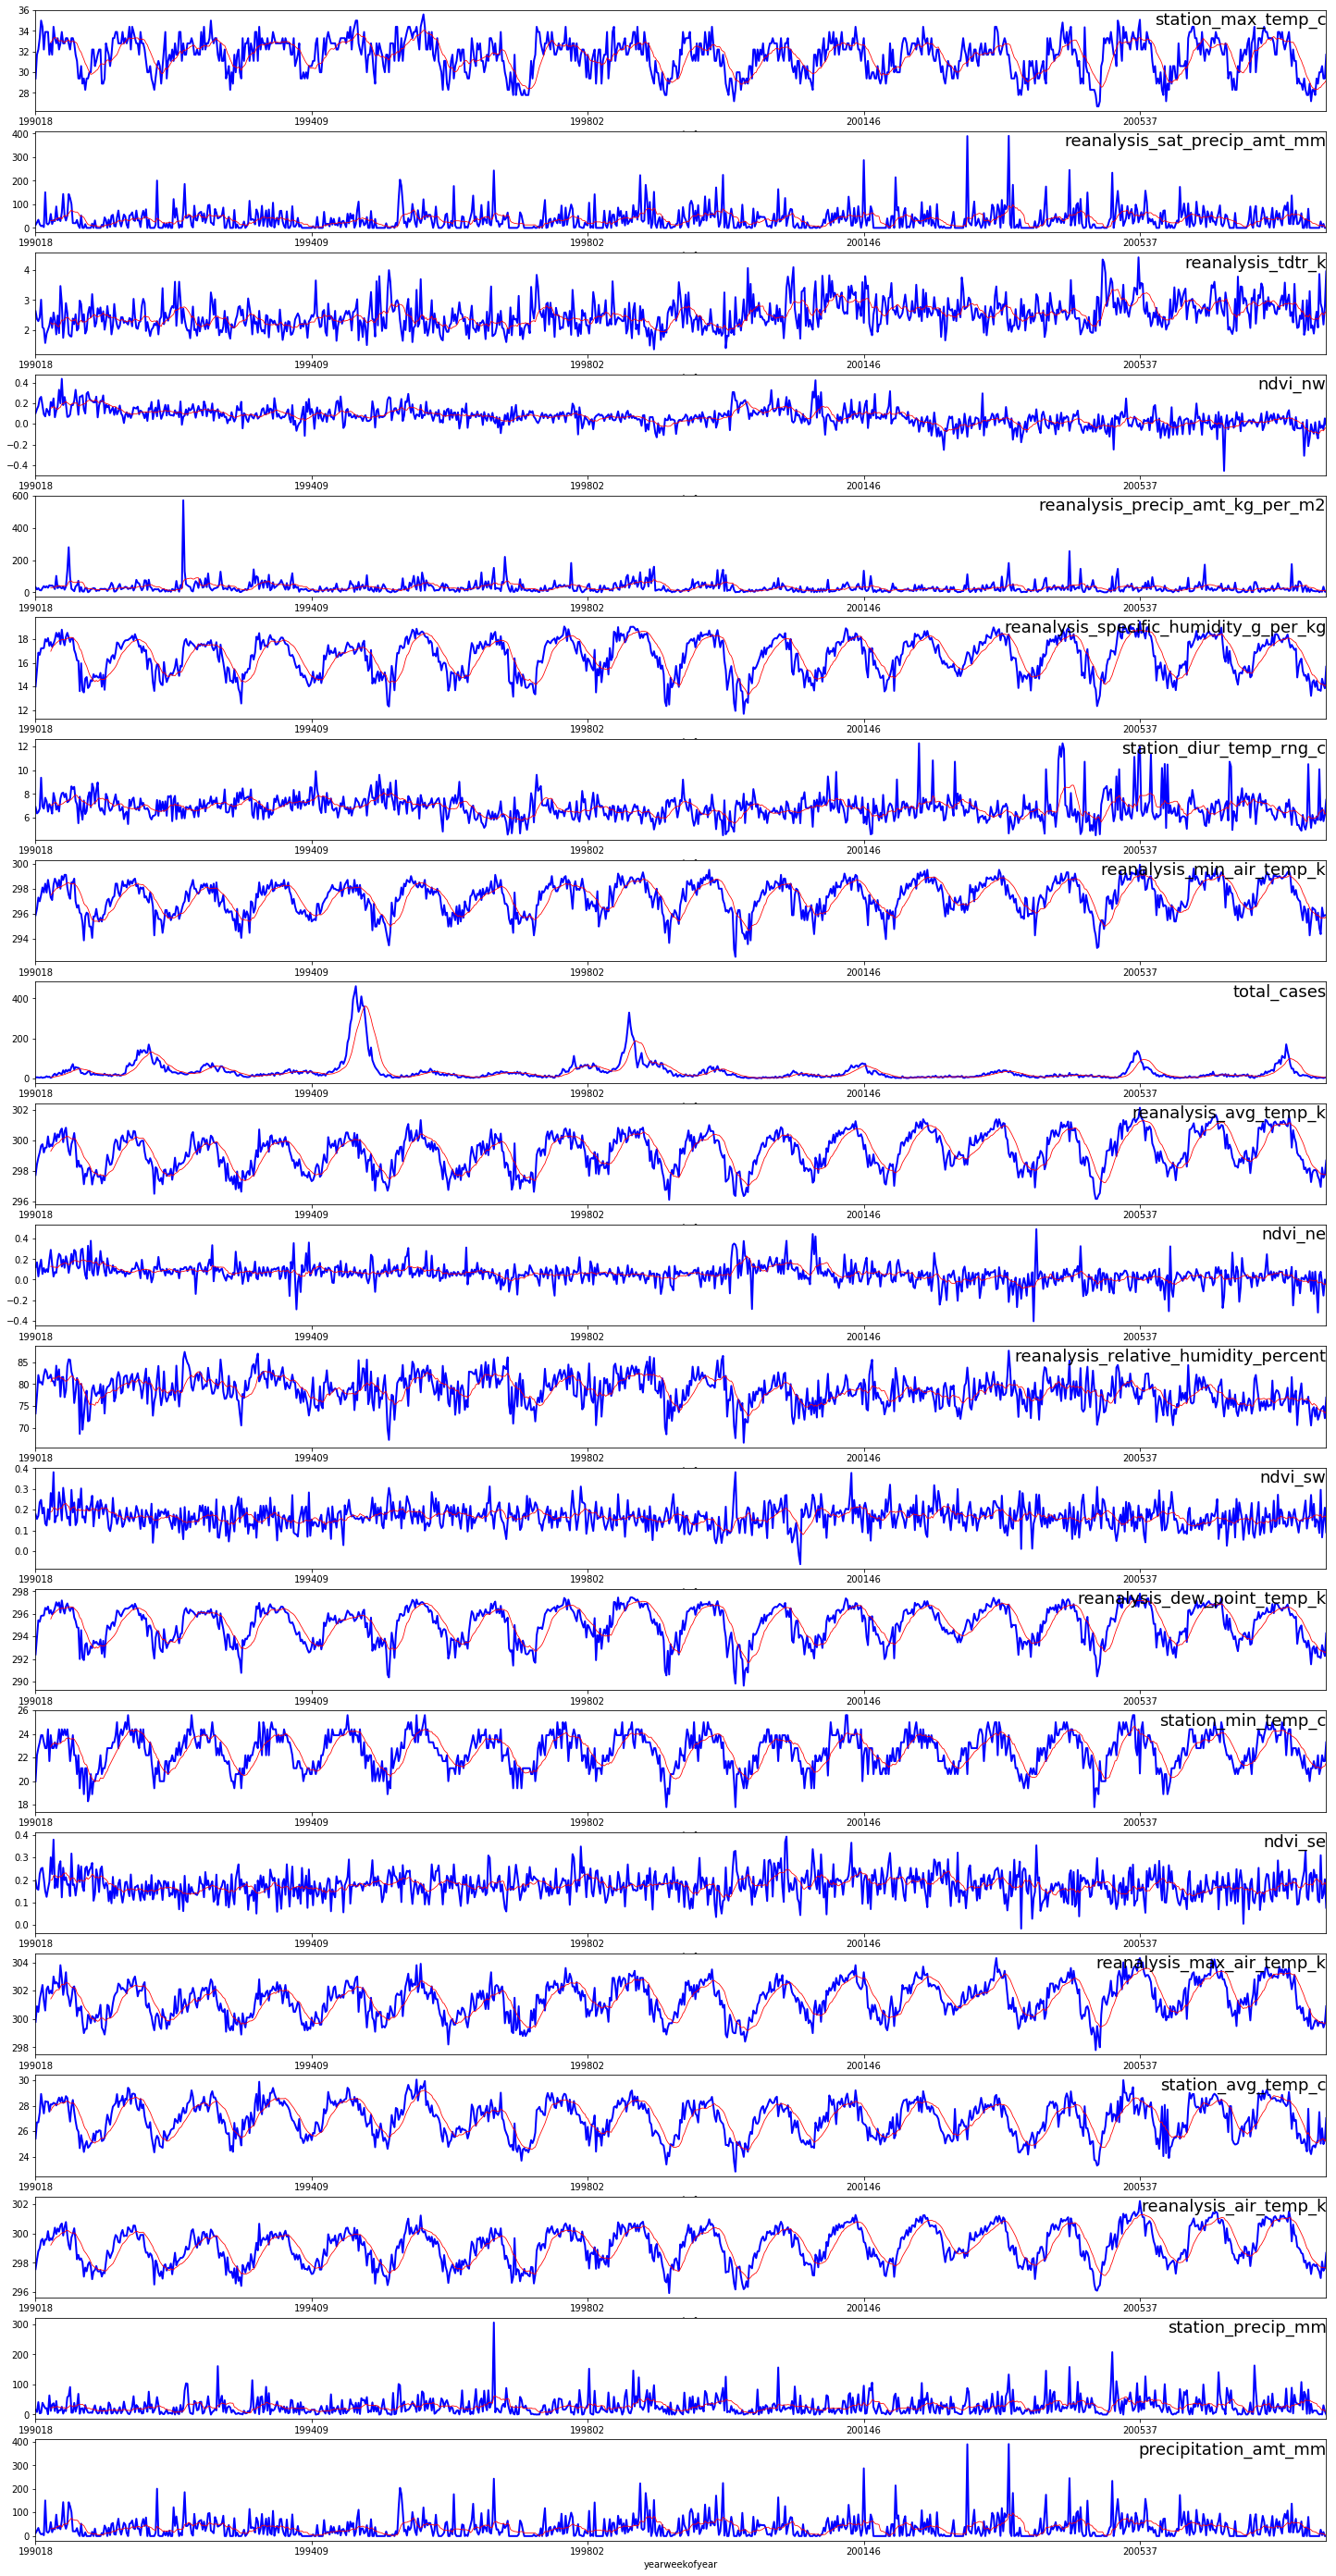

In [26]:
myutil.plot_cols2(dftrain)